# TP 3: Data Mining
## I. Introduction
### 1. Importation de jeu de données Iris
on import ce jeux de données et on affiche les 10 premiers exemplaires

In [1]:
from sklearn import datasets
iris_dataset= datasets.load_iris()
print(f"Observations: {iris_dataset.data[:10]}\nClass: {iris_dataset.target[:10]}")

Observations: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Class: [0 0 0 0 0 0 0 0 0 0]


### 2. Observations sur ce jeu de données
#### a. Distribution
- Ce tableau constitue la matrice d'observations, dont les lignes sont les observations et les colonnes sont les caractéristiques.
- Il y a $150$ observations dont chacune est définie par ces $4$ caractéristique (dans cet ordre):
    + La longueur du sépale en $\texttt{cm}$
    + La largeur du sépale en $\texttt{cm}$
    + La longueur du pétale en $\texttt{cm}$
    + La largeur du pétale en $\texttt{cm}$
- Il s'agit d'un problème de classification, et il y a $3$ classes:
    + Setosa: c'est la classe $0.$
    + Versicolor: c'est la classe $1.$
    + Virginica: c'est la classe $2.$
- On remarque que ce jeu de donnée est bien trié par rapport à la classe. De plus, les classes sont équiprobable dans ce jeu:
    + Les $50$ premiers observations appertiennent à la classe $0$
    + Les $50$ observations suivantes appertiennent à la classe $1$
    + Les $50$ derniers observations appertiennent à la classe $2$


Number of features is 4:
	- sepal length (cm)
	- sepal width (cm)
	- petal length (cm)
	- petal width (cm)

Number of classes is 3:
	- 0 <-> setosa
	- 1 <-> versicolor
	- 2 <-> virginica

Attributes of 32nd observation (Counting from 1):
	- sepal length (cm): 5.4
	- sepal width (cm): 3.4
	- petal length (cm): 1.5
	- petal width (cm): 0.4
	- This flower belongs to the setosa family within the iris species


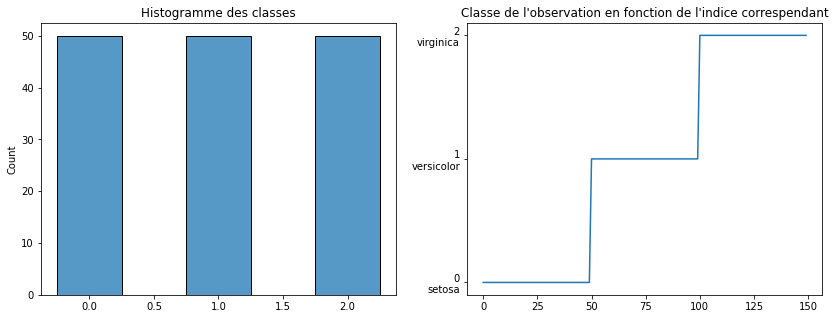

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
print(f"Number of features is {len(iris_dataset.feature_names)}:")
for feature_name in iris_dataset.feature_names:
    print(f"\t- {feature_name}")
print()
print(f"Number of classes is {len(iris_dataset.target_names)}:")
for i,class_name in enumerate(iris_dataset.target_names):
    print(f"\t- {i} <-> {class_name}")
print()
print("Attributes of 32nd observation (Counting from 1):")
for i,feature_name in enumerate(iris_dataset.feature_names):
    print(f"\t- {feature_name}: {iris_dataset.data[31][i]}")
print(f"\t- This flower belongs to the {iris_dataset.target_names[iris_dataset.target[31]]} family within the iris species")

def plot_histogram(y,ax=None):
    ax=sns.histplot(x=y,ax=ax,discrete=True,shrink=.5)
    ax.set_title("Histogramme des classes")
    return ax

def plot_class_index_relation(y,ax=None):
    ax=sns.lineplot(x=np.arange(len(y)),y=y,ax=ax)
    ax.set_xticks(np.arange(7)*25)
    ax.set_yticks(np.arange(3))
    ax.set_yticklabels(labels=[f"{i}\n{target_name}" for i,target_name in enumerate(iris_dataset.target_names)])
    ax.set_title("Classe de l'observation en fonction de l'indice correspendant")
fig,ax=plt.subplots(1,2)
fig.set_size_inches(14,5)
plot_histogram(iris_dataset.target,ax=ax[0])
plot_class_index_relation(iris_dataset.target,ax=ax[1])

#### b. Visualisation
On a fournit une version un peu généralisée:
- <code>f1</code> est l'indice du premier attribut voulu
- <code>f2</code> est l'indice du deuxième attribut voulu

En général, les classes de ce jeu de données ne sont pas linéairement séparables. Par contre, la classe **setosa** est linéairement séparable par rapport aux deux autres classes.

Pour simplifier, on ne considère que les deux premiers attributs dans l'équation. On remarque qu'une telle droite $\Delta$ est la droite passante par les points: $P=(x_1,y_1)=(4.5,2.2)$ et $P_2=(x_2,y_2)=(6.5,4.5):$
$$
\Delta: y=\quad \frac{y_2-y_1}{x_2-x_1}(x-x_1)+y_1\approx 1.15 x-2.97
$$

Ainsi, en considérant tous les attributs, cette classe est aussi linéairement séparable par l'hyperplan:
$$
\mathcal{H}: x_2\approx 1.15 x_1-2.97 +0x_3+0x_4
$$

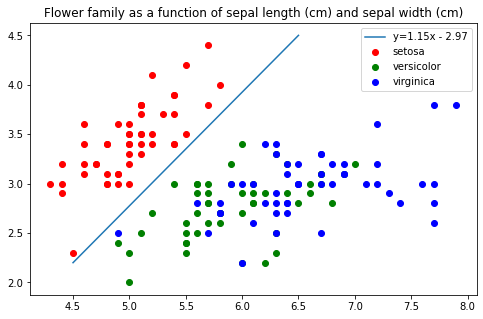

In [3]:
import matplotlib
from cycler import cycle
import pylab as pl
def plot_2D(data, target, target_names,feature_names,f1=0,f2=1):
    colors = cycle('rgbcmykw') # cycle de couleurs
    target_ids = range(len(target_names))
    fig,ax=pl.subplots()
    fig.set_size_inches(8,5)
    for i, c, label in zip(target_ids, colors, target_names):
        ax.scatter(data[target == i, f1], data[target == i, f2], c=c, label=label)
    ax.set_title(f"Flower family as a function of {feature_names[f1]} and {feature_names[f2]}")
    ax.legend()
    return ax
ax=plot_2D(iris_dataset.data,iris_dataset.target,iris_dataset.target_names,iris_dataset.feature_names)
x_lim=(4.5,6.5)
y_lim=(2.2,4.5)
delta_x=x_lim[1]-x_lim[0]
delta_y=y_lim[1]-y_lim[0]
alpha=delta_y/delta_x
beta=y_lim[0]-alpha*x_lim[0]
ax.plot(x_lim,y_lim,label=f"y={alpha:.2f}x {'+' if beta >= 0 else '-'} {abs(beta):.2f}")
ax.legend()

## III. Classification
### 1. Programme 1
- Ce programme affiche la classe prédite de la $32^\text{ème}$ et la dernière observation, ensuite de tout le jeu de donnée.
- La prédiction sera faite à l'aide d'un modèle de Naive Bayes multinomial entraîné par le même jeu de données, mais en excluant la dernière observation.

In [4]:
from sklearn import naive_bayes
def print_prediction(p:int):
    print(f"Predicted class of this observation is {p} <-> {iris_dataset.target_names[p]}")

nb = naive_bayes.MultinomialNB(fit_prior=True)# un algo d'apprentissage
irisData = datasets.load_iris()
nb.fit(irisData.data[:-1], irisData.target[:-1])
p_31 = nb.predict(np.atleast_2d(irisData.data[31]))
print_prediction(p_31[0])
p_last = nb.predict(np.atleast_2d(irisData.data[-1]))
print_prediction(p_last[0])
p = nb.predict(irisData.data[:])
print(f"Prediction of all observations:{p}")

Predicted class of this observation is 0 <-> setosa
Predicted class of this observation is 2 <-> virginica
Prediction of all observations:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 2. Programme 2
- Ce programme affiche les classe prédite des observations dont l'indice est entre $100$ et $148$ inclusivement (en comptant de $0$)
- La prédiction sera faite à l'aide d'un modèle $\mathcal{M}$ de Naive Bayes entraîné par les $99$ premiers observations de jeu de données IRIS

On observe que les résultats ne sont pas cohérents, car en faite, On sait que la plage $100\dots 148$ correspend à des observations dont la classe réelle est $2.$ Ainsi l'error de test est $100\%$

Une interpréation possible est le faite que notre modèle $\mathcal{M}$ a été entrainé avec un jeu donnée qui n'a aucune observation dont la classe est $2.$ Donc il a mis l'hypothèse que les classes possibles sont seulement $0$ (setosa) et $1$ (versicolor). 

Finalement, puisque dans ce jeu de données, on remarque que les membres de la classe $2$ (virgina) sont plus similaires aux membres de la classes $1$ que ceux de $0,$  $\mathcal{M}$ les a considérés comme des membres de la classe $1$

Une correction possible est de donner un ordre aléatoire aux observations (attributs + classe), c'est à dire faire un shuffle.

In [5]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(irisData.data[0:99], irisData.target[0:99])
nb.predict(irisData.data[100:149])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

## III. Evaluation
### 0. Initialisation de modèle $\mathcal{M}$

In [6]:
from sklearn.model_selection import train_test_split
M=naive_bayes.MultinomialNB(fit_prior=True)
M.fit(irisData.data,irisData.target)

MultinomialNB()

### 1. Calcul de performance du modèle $\mathcal{M}$
#### a. Méthode Naive

In [7]:
Y=irisData.target
P=M.predict(irisData.data)
ea = 0
for i in range(len(irisData.data)):
    if (P[i] != Y[i]):
        ea = ea+1
err=ea/len(irisData.data)
print(f"L'erreur est e = {err:.3f}")

L'erreur est e = 0.047


#### b. One Liner

In [8]:
print(f"L'erreur est e = {(M.predict(irisData.data)!=irisData.target).mean():.3f}")

L'erreur est e = 0.047


#### c. Méthode <code>score</code> de classificateur $\mathcal{M}$

In [9]:
print(f"L'erreur est e = {1-M.score(irisData.data,irisData.target):.3f}")

L'erreur est e = 0.047


#### d. Recherche des observations où il y'a une erreur de prédiction 

In [10]:
Y=irisData.target
P=M.predict(irisData.data)
L=[]
for i in range(len(irisData.data)):
    if (P[i] != Y[i]):
        L.append(i)
print(f"Indices des observations où notre modèle a trompé:{L}")

Indices des observations où notre modèle a trompé:[68, 70, 72, 83, 129, 131, 133]


### 3. Performance de généralisation
#### a. Estimation de l'erreur $\mathcal{E}$ par division de l'échantillon d'apprentissage 
On implémente tout d'abord les fonctions nécessaires

In [11]:
import random
def join(X,y):
    return np.c_[irisData.data,irisData.target]

def split(S,p:float=2/3):
    n=len(S)
    r=int(n*p)
    I=np.arange(n)
    random.shuffle(I)
    S_train,S_test=S[I[:r]],S[I[r:]]
    X_train,y_train=S_train[:,:-1],S_train[:,-1]
    X_test,y_test=S_test[:,:-1],S_test[:,-1]
    return X_train,y_train,X_test,y_test

def split2(S,p:float=2/3):
    n=len(S)
    r=int(n*p)
    
def test(S,model,p=2/3):
    X_train,y_train,X_test,y_test=split(S,p)
    return 1-model.fit(X_train,y_train).score(X_test,y_test)

On teste cette fonction et on compare son résultat avec l'erreur calculée auparavant

In [12]:
S=join(irisData.data,irisData.target)
X_train,y_train,X_test,y_test=split(S)
print(f"Erreur calculée avec un train/test split: {test(S,naive_bayes.MultinomialNB(fit_prior=True)):.3f}")
print(f"Erreur calculée en entraînant tout le jeu de données: {err:.3f}")

Erreur calculée avec un train/test split: 0.060
Erreur calculée en entraînant tout le jeu de données: 0.047


- L'erreur moyenne $\mathcal{E}$ est une variable aléatoire.
- L'erreur moyenne en fonction de nombre de tests $t$ est une variable aléatoire $\mathcal{E}(t).$
- Pour $t\in\{10,20,50,100,200,500,1000\},$ on calcule $K=20$ estimations de $\mathcal{E}(t).$

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
def plot_tests(S,model,T,p=2/3,K=20):
    m=len(T*K)
    T=np.array(T*K)
    E=np.zeros(m)
    for i,t in enumerate(T):
        Z=np.zeros(t)
        for j in range(t):
            Z[j]=test(S,model,p)
        E[i]=Z.mean()
    fig,ax=plt.subplots()
    ax=sns.lineplot(x=T,y=E,ax=ax)
    ax.set_title("Erreur moyenne en fonction de nombre de tests")
    return ax,T,E
model=naive_bayes.MultinomialNB(alpha=0.1 ,fit_prior=True)
tests=[10,20,50,100,200,500,1000]
m=len(tests)
K=20
ax,T,E=plot_tests(S,model,tests,p=.75,K=K)

Statistiques sur l'erreur moyenne en fonction de nombres de tests

In [14]:
#ax.set_ylim((0,1))
from scipy import stats
error_stats={}
k=0
for t in tests:
    error_stats[t]=E[k::m]
    k+=1
print(pd.DataFrame(error_stats).describe())

            10         20         50         100        200        500   \
count  20.000000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean    0.188553   0.170329   0.180211   0.183632   0.179934   0.180089   
std     0.052167   0.031534   0.024606   0.017743   0.009213   0.006581   
min     0.110526   0.125000   0.111053   0.144474   0.166974   0.169789   
25%     0.152632   0.148684   0.171711   0.177500   0.174638   0.174658   
50%     0.176316   0.162500   0.180263   0.185526   0.177895   0.179237   
75%     0.222368   0.184868   0.190263   0.196579   0.184079   0.186461   
max     0.286842   0.260526   0.226842   0.207105   0.200921   0.190158   

            1000  
count  20.000000  
mean    0.182242  
std     0.004289  
min     0.174342  
25%     0.179197  
50%     0.182539  
75%     0.185704  
max     0.189263  


##### Conclusion
- On constate que quand $t$ augmente, l'erreur moyenne sera plus stable, c'est à dire la deviation standard diminue.
- On peut considérer qu'à partir de $t\ge 200,$ l'erreur moyenne est stable.
- Une interprétation simple de ce résultat qu'à en augmentant $t,$ on fait plus d'estimation de $\mathcal{E}.$ Et donc on approche "l'erreur réelle". On effet, d'après la loi de limite centrale: 
$$
\lim_{t\rightarrow +\infty}\mathcal{E}(t)=\mathcal{E}
$$
On estime maintenant l'erreur moyenne en changeant la taille de l'ensemble d'entraînement:

In [15]:
def stable_test(S,model,t,p=2/3,K=20):
    Z=np.zeros(t)
    for j in range(t):
        Z[j]=test(S,model,p)
    return Z.mean()
print(f"Erreur avec p=0.5: {stable_test(S,naive_bayes.MultinomialNB(fit_prior=True),p=.5,t=1000):.3f}")
print(f"Erreur avec p=0.66: {stable_test(S,naive_bayes.MultinomialNB(fit_prior=True),t=1000):.3f}")
print(f"Erreur avec p=0.90: {stable_test(S,naive_bayes.MultinomialNB(fit_prior=True),p=.9,t=1000):.3f}")

Erreur avec p=0.5: 0.238
Erreur avec p=0.66: 0.200
Erreur avec p=0.90: 0.119


Implémentation avec <code>train_test_split</code>

In [16]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(irisData.data,irisData.target,test_size=.2)

Estimations d'erreurs avec <code>train_test_split</code>

In [17]:
A=[.1,.25,1/3,.5,.75,.9,.95]
m=len(A)
Errs=np.zeros(m)
for i,a in enumerate(A):
    X1_train,X1_test,y1_train,y1_test=train_test_split(irisData.data,irisData.target,test_size=a)
    Errs[i]=1-naive_bayes.MultinomialNB(fit_prior=True).fit(X1_train,y1_train).score(X1_test,y1_test)
print(Errs)

[0.13333333 0.10526316 0.04       0.30666667 0.21238938 0.34074074
 0.06293706]


#### b. Estimation de l'erreur $\mathcal{E}$ avec la validation croisée
On estime avec une validation croisée par $k\in\{2,\dots,20\}$ folds

L'erreur estimé avec 2 folds est: 0.034
L'erreur estimé avec 3 folds est: 0.047
L'erreur estimé avec 5 folds est: 0.034
L'erreur estimé avec 8 folds est: 0.047


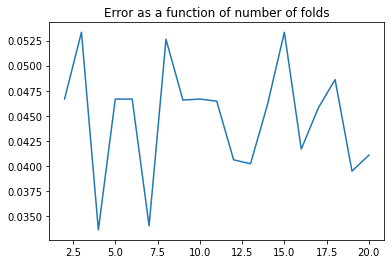

In [18]:
from sklearn.model_selection import cross_val_score
K=20
def plot_cv_errors(X,y,model,K=20,ax=None):
    Errs_cv=np.zeros(K-1)
    for k in range(1,K):
        Errs_cv[k-1]=1-cross_val_score(model,X,y,cv=k+1).mean()
    ax=sns.lineplot(x=np.arange(2,K+1),y=Errs_cv)
    ax.set_title("Error as a function of number of folds")
    return ax,Errs_cv
ax,Errs_cv=plot_cv_errors(irisData.data,irisData.target,naive_bayes.MultinomialNB(fit_prior=True))
for i in [2,3,5,8]:
    print(f"L'erreur estimé avec {i} folds est: {Errs_cv[i]:.3f}")

## IV. Evaluation avec une arbre de décision
### 1. Arbre de décision simple

L'erreur estimé avec 2 folds est: 0.033
L'erreur estimé avec 3 folds est: 0.040
L'erreur estimé avec 5 folds est: 0.053
L'erreur estimé avec 8 folds est: 0.047


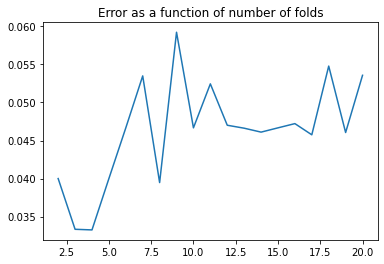

In [19]:
from sklearn.tree import DecisionTreeClassifier
ax,Errs_cv=plot_cv_errors(irisData.data,irisData.target,DecisionTreeClassifier())
for i in [2,3,5,8]:
    print(f"L'erreur estimé avec {i} folds est: {Errs_cv[i]:.3f}")

### 2. Random Forest

L'erreur estimé avec 2 folds est: 0.040
L'erreur estimé avec 3 folds est: 0.033
L'erreur estimé avec 5 folds est: 0.040
L'erreur estimé avec 8 folds est: 0.047


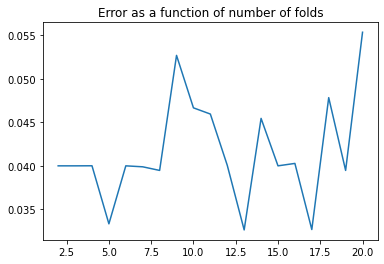

In [20]:
from sklearn.ensemble import RandomForestClassifier
ax,Errs_cv=plot_cv_errors(irisData.data,irisData.target,RandomForestClassifier())
for i in [2,3,5,8]:
    print(f"L'erreur estimé avec {i} folds est: {Errs_cv[i]:.3f}")

### 3. KNearest Neighbours

L'erreur estimé avec 2 folds est: 0.033
L'erreur estimé avec 3 folds est: 0.027
L'erreur estimé avec 5 folds est: 0.033
L'erreur estimé avec 8 folds est: 0.033


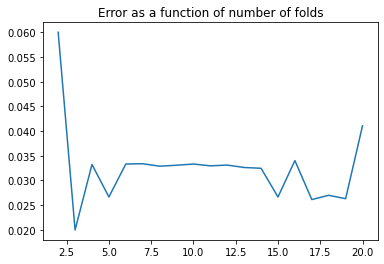

In [21]:
from sklearn.neighbors import KNeighborsClassifier
ax,Errs_cv=plot_cv_errors(irisData.data,irisData.target,KNeighborsClassifier(5))
for i in [2,3,5,8]:
    print(f"L'erreur estimé avec {i} folds est: {Errs_cv[i]:.3f}")

### 4. Conclusion
On constate que les erreurs sont proches, particulièrement, ils sont à l'ordre de $e\in [0.025,0.05]$.

Le KNearestNeighbors avec $K=5$ est le modèle le plus précis dans notre cas, avec $3$ folds, il admet comme erreur $0.027$